In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('desafio1.csv')


In [3]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [5]:
df.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


-idade reflete na pontuação de cŕedito do cliente

In [6]:
def process_age(df, cut_points,labels):
  df['Categorias_Idades'] = pd.cut(df['idade'], cut_points, labels = labels)
  return df 
cut_points = [18,25,35,40,60,100]
labels = ['Jovem Adulto', 'Adultez Plena', 'Adultez final', 'Meia Idade', 'Idoso']

df = process_age(df,cut_points,labels)


In [7]:
df[df['Categorias_Idades'] == 'Jovem Adulto']['pontuacao_credito'].mean()

652.4530516431925

In [8]:
df[df['Categorias_Idades'] == 'Adultez Plena']['pontuacao_credito'].mean()

648.2604124545087

In [9]:
df[df['Categorias_Idades'] == 'Adultez final']['pontuacao_credito'].mean()

652.4694533762058

In [10]:
df[df['Categorias_Idades'] == 'Meia Idade']['pontuacao_credito'].mean()

648.6132671480144

In [11]:
df[df['Categorias_Idades'] == 'Idoso']['pontuacao_credito'].mean()

650.8301886792453

In [12]:
pivot_table = df.pivot_table(index = 'Categorias_Idades', values = 'pontuacao_credito', aggfunc= np.mean)
pivot_table

,pontuacao_credito
Categorias_Idades,
Jovem Adulto,652.453052
Adultez Plena,648.260412
Adultez final,652.469453
Meia Idade,648.613267
Idoso,650.830189



2.Idade reflete no nível de estabilidade do cliente

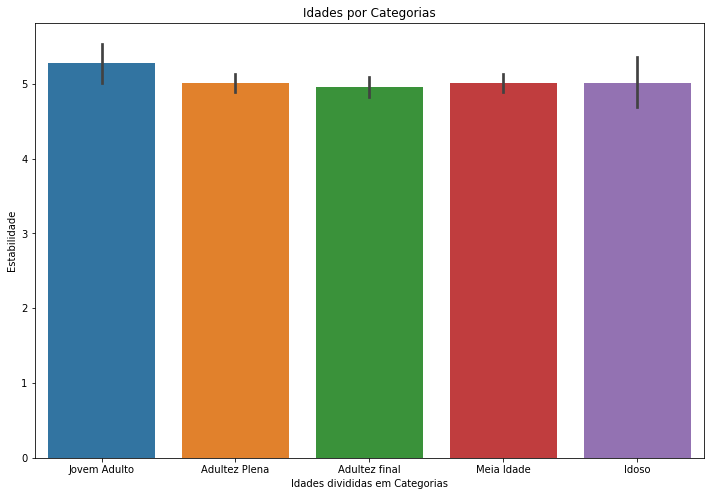

In [13]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Categorias_Idades', y = 'nivel_estabilidade', data = df)
plt.xlabel('Idades divididas em Categorias')
plt.ylabel('Estabilidade')
plt.title('Idades por Categorias')
plt.show()


Quanto maior a pontuação maior o saldo em conta

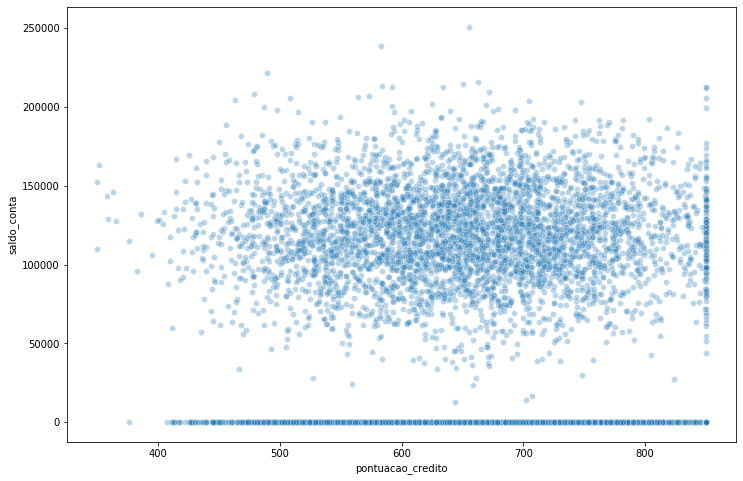

In [14]:

plt.figure(figsize = (12,8))
sns.scatterplot(x = 'pontuacao_credito', y = 'saldo_conta', data = df, alpha = 0.3)
plt.show()

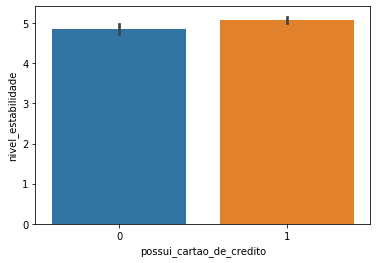

In [15]:
sns.barplot(x = 'possui_cartao_de_credito', y= 'nivel_estabilidade', data = df)


In [16]:

pontuacao_estados = df.groupby('estado_residencia').agg({'pontuacao_credito': [stats.mode,np.median, np.mean, np.std]})


In [17]:
pontuacao_estados.columns = [
  'moda', 'mediana', 'media', 'desvio_padrao'
]

In [18]:
pontuacao_estados

,moda,mediana,media,desvio_padrao
estado_residencia,,,,
PR,"([850], [47])",650,648.961294,98.607186
RS,"([850], [42])",650,651.105143,95.136598
SC,"([850], [78])",653,649.537653,97.233493


In [19]:
def extrai_moda(val):
  result = val.mode.tolist()[0]
  return result

pontuacao_estados['moda'] = pontuacao_estados['moda'].apply(extrai_moda)


In [20]:
result = pontuacao_estados 
result

,moda,mediana,media,desvio_padrao
estado_residencia,,,,
PR,850,650,648.961294,98.607186
RS,850,650,651.105143,95.136598
SC,850,653,649.537653,97.233493


In [21]:

result.to_json('submission.json',orient = 'index')

In [22]:
pd.read_json('submission.json')

,PR,RS,SC
moda,850.000000,850.000000,850.000000
mediana,650.000000,650.000000,653.000000
media,648.961294,651.105143,649.537653
desvio_padrao,98.607186,95.136598,97.233493


In [26]:
df = df.sort_values('estado_residencia', ascending=True)

In [27]:

#df.to_json('submission.json', orient='index')
df.to_json(orient='index')

'{"3412":{"RowNumber":3413,"id":"f3fb6e2f5a8f8494227a7f46acabafe241e1df79","sobrenome":"61653deb814ff728fb6593bdbb360e07f964783f","pontuacao_credito":582,"estado_residencia":"PR","genero":"M","idade":26,"nivel_estabilidade":6,"saldo_conta":114450.32,"numero_produtos":1,"possui_cartao_de_credito":1,"membro_ativo":1,"Categorias_Idades":"Adultez Plena"},"6831":{"RowNumber":6832,"id":"cddb9d176f3ec926ed5fd31b678a0dc904a2a6a5","sobrenome":"cf2690112f649b5f0309e17815afb11eb1b64ede","pontuacao_credito":469,"estado_residencia":"PR","genero":"F","idade":52,"nivel_estabilidade":8,"saldo_conta":139493.25,"numero_produtos":3,"possui_cartao_de_credito":0,"membro_ativo":0,"Categorias_Idades":"Meia Idade"},"6280":{"RowNumber":6281,"id":"37c93c899a5b208a9a27886d993b334371b4b7b4","sobrenome":"2856d988d02ebd51654feeaeb0142b39b55050c7","pontuacao_credito":491,"estado_residencia":"PR","genero":"M","idade":26,"nivel_estabilidade":4,"saldo_conta":102251.14,"numero_produtos":1,"possui_cartao_de_credito":1,"m